# **<span style="color:#e76f51;">Training of EEG Signals For Schizophrenia Disorder using CNN</span>**

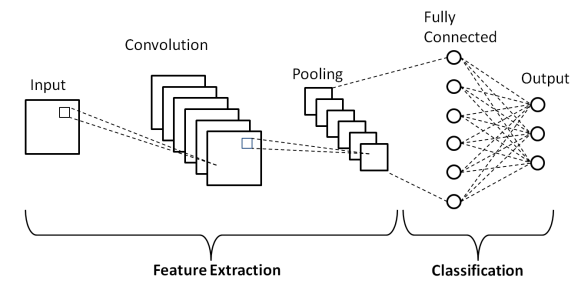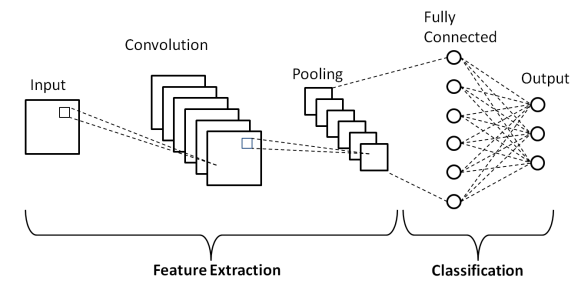


# **<span style="color:#e76f51;">Goal</span>**
The goal of this Notebook is to develop a model to Classify individual Patient EEG Signals using Convolutional Neural Networks.

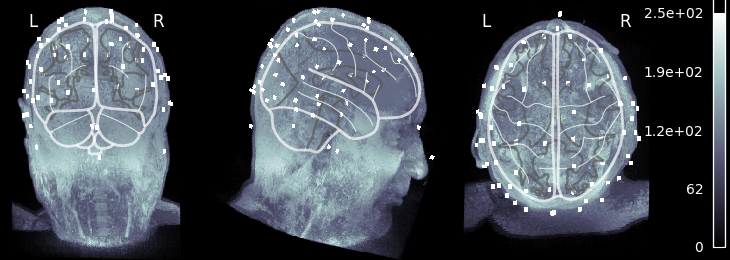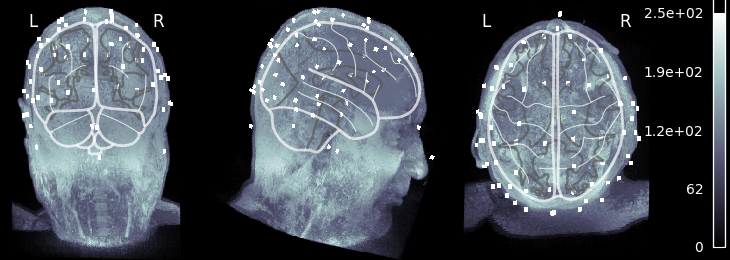
​
# **<span style="color:#e76f51;">Data Context</span>**
​
The data in this Notebook contains EEG Signals of over 80+ Patients each having several Trials Data. 
​
`../input/button-tone-sz` , `../input/buttontonesz2`  - Folders containing the training Signals
​
 
Humans (and many other animals) have the ability to reduce or suppress their brains' responses to sensory consequences that are a result of their own actions. The nervous system accomplishes this with a corollary discharge forward model system in which an "efference copy" of an impending motor plan is transmitted from motor to sensory cortex where it generates a "corollary discharge" representation of the expected sensory consequences of the imminent motor act. For example, when you move your eyes from left to right, your brain knows the environment is not shifting. When you speak, your auditory cortex has a reduced response to the expected sound of your voice.

Schizophrenia is a chronic mental illness that affects about 1% of people across the globe. One possible explanation for some of the symptoms of schizophrenia is that one or more problems with the corollary discharge process in the nervous system makes it difficult for patients to differentiate between internally and externally generated stimuli. Therefore, studying this process and its relationship to symptoms in the illness might allow us to better understand abnormal brain processes in patients with this diagnosis.

In a previously published EEG experiment (full report), They used a simple button pressing task in which subjects either (1) pressed a button to immediately generated a tone, (2) passively listened to the same tone, or (3) pressed a button without generating a tone to study the corollary discharge in people with schizophrenia and comparison controls. We found that comparison controls suppressed the N100, a negative deflection in EEG brain wave 100 milliseconds after the onset of a sound, when they pressed a button to generate a tone compared to passive playback, but patients with schizophrenia did not. This data set is a larger sample replication of that previous study. Specifically, EEG data from 22 controls and 36 patients with schizophrenia have been combined with 10 controls and 13 patients from their previous report.

# **<span style="color:#e76f51;">Basic Imports</span>**

In [1]:
import os
import time
import numpy as np
import pandas as pd

import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
     
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
! for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

tee: '/sys/bus/pci/devices/0000:00:00.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:01.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:01.3/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:03.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:04.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:05.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:06.0/numa_node': Read-only file system
0


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/button-tone-sz/columnLabels.csv
/kaggle/input/button-tone-sz/ERPdata.csv
/kaggle/input/button-tone-sz/demographic.csv
/kaggle/input/button-tone-sz/time.csv
/kaggle/input/button-tone-sz/mergedTrialData.csv
/kaggle/input/button-tone-sz/18.csv/18.csv
/kaggle/input/button-tone-sz/20.csv/20.csv
/kaggle/input/button-tone-sz/71.csv/71.csv
/kaggle/input/button-tone-sz/74.csv/74.csv
/kaggle/input/button-tone-sz/1.csv/1.csv
/kaggle/input/button-tone-sz/24.csv/24.csv
/kaggle/input/button-tone-sz/78.csv/78.csv
/kaggle/input/button-tone-sz/75.csv/75.csv
/kaggle/input/button-tone-sz/11.csv/11.csv
/kaggle/input/button-tone-sz/17.csv/17.csv
/kaggle/input/button-tone-sz/77.csv/77.csv
/kaggle/input/button-tone-sz/16.csv/16.csv
/kaggle/input/button-tone-sz/68.csv/68.csv
/kaggle/input/button-tone-sz/3.csv/3.csv
/kaggle/input/button-tone-sz/19.csv/19.csv
/kaggle/input/button-tone-sz/73.csv/73.csv
/kaggle/input/button-tone-sz/5.csv/5.csv
/kaggle/input/button-tone-sz/2.csv/2.csv
/kaggle/input/b

In [3]:
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [4]:
demographic[" group"].mean()

0.6049382716049383

In [5]:
demographic[" group"].value_counts()

1    49
0    32
Name:  group, dtype: int64

In [6]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")
        

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


In [7]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [8]:
electrodes_list = list(pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


In [9]:
import os

# Create a directory to store the files
if not os.path.exists('/kaggle/working/models'):
    os.mkdir('/kaggle/working/models')

In [10]:
# List files in the working directory
files = os.listdir('/kaggle/working/models')
print(files)

[]


# **<span style="color:#e76f51;">Data PreProcessing</span>**

In [11]:
def averaged_by_N_rows(a, n):
    """ 
    A function that averages n rows in a matrix
    """
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0] // n, n, 
                  shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec
    

In [12]:
N_AVERAGED = 16
X = np.zeros((81 * 100,  9216 * len(electrodes_list) // N_AVERAGED), dtype="float32")
Y = np.zeros(len(X))

part1_path = "../input/button-tone-sz"
part2_path = "../input/buttontonesz2"

# We pull out only those experiments where there were 9216 measurements (most often named so many times)
x_counter = 0
column_list = pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns
for person_number in tqdm(range(1, 81 + 1)):


    csv_path = f"{part1_path}/{person_number}.csv/{person_number}.csv"
    if not os.path.exists(csv_path):
        csv_path = f"{part2_path}/{person_number}.csv/{person_number}.csv"
    df = pd.read_csv(csv_path, 
                header=None,
                names=column_list)
    trials_list = set(df.trial)


    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_AVERAGED)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1
print("Total trials with the Appropriate number of measurements - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]
        
print("Total trials with the Appropriate number of measurements- ", x_counter)

  0%|          | 0/81 [00:00<?, ?it/s]

Total trials with the Appropriate number of measurements -  7092
Total trials with the Appropriate number of measurements-  7092


In [13]:
X.shape

(7092, 40320)

In [14]:
Y.shape

(7092,)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
X_norm = (normalize(X.reshape(-1, 70), axis=0, norm='max')).reshape(X.shape)

In [17]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

In [18]:
_norm = X

In [19]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0], len(electrodes_list), X_train_norm.shape[1] // len(electrodes_list), 1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0], len(electrodes_list), X_test_norm.shape[1] // len(electrodes_list), 1)

# **<span style="color:#e76f51;">CNN Model</span>**

In [20]:
model0 = Sequential()
model0.add(Conv2D(32, kernel_size=(5, 20),
                 activation='tanh',
                 input_shape=(X_train_2d.shape[1:])))
model0.add(MaxPooling2D(pool_size=(5, 15)))

model0.add(Conv2D(13, kernel_size=(3, 3),
                 activation='tanh',))
model0.add(MaxPooling2D(pool_size=(3, 3)))
          

model0.add(Dropout(0.2))
model0.add(Flatten())

model0.add(Dense(317, activation='relu'))

model0.add(Dense(1, activation='sigmoid'))

In [21]:
model0.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.000008),
              metrics=['acc'])
model0_checkpoint = ModelCheckpoint('/kaggle/working/models/best_model_weights1.h5' , monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [22]:
history_params0 = []

### <span style="color:#e76f51;">Training Starts</span>

In [23]:
history0 = model0.fit(X_train_2d, Y_train_norm,
          batch_size=17,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm), callbacks=[model0_checkpoint])
model0.save_weights('/kaggle/working/models/best_model_weights1.h5')

Epoch 1/100
334/334 [==============================] - 11s 11ms/step - loss: 0.6856 - acc: 0.5745 - val_loss: 0.6765 - val_acc: 0.5927
Epoch 2/100
334/334 [==============================] - 3s 9ms/step - loss: 0.6713 - acc: 0.5983 - val_loss: 0.6709 - val_acc: 0.5927
Epoch 3/100
334/334 [==============================] - 3s 9ms/step - loss: 0.6677 - acc: 0.5983 - val_loss: 0.6704 - val_acc: 0.5927
Epoch 4/100
334/334 [==============================] - 3s 9ms/step - loss: 0.6664 - acc: 0.5983 - val_loss: 0.6702 - val_acc: 0.5927
Epoch 5/100
334/334 [==============================] - 3s 9ms/step - loss: 0.6661 - acc: 0.5983 - val_loss: 0.6700 - val_acc: 0.5927
Epoch 6/100
334/334 [==============================] - 3s 10ms/step - loss: 0.6657 - acc: 0.5983 - val_loss: 0.6697 - val_acc: 0.5927
Epoch 7/100
334/334 [==============================] - 3s 9ms/step - loss: 0.6652 - acc: 0.5983 - val_loss: 0.6695 - val_acc: 0.5927
Epoch 8/100
334/334 [==============================] - 3s 9ms/step

## <span style="color:#e76f51;">Summarize History For Accuracy</span>

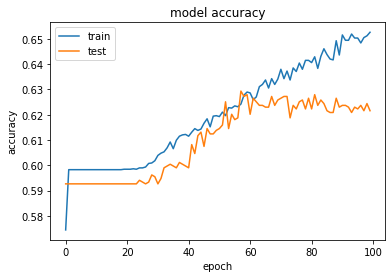

In [24]:
plt.plot(history0.history['acc'])
plt.plot(history0.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">summarize history for loss</span></span>

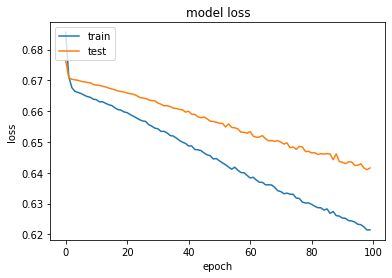

In [25]:
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
accuracy0, loss0 = model0.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy0}  val loss={loss0}")

45/45 [==============================] - 0s 7ms/step - loss: 0.6416 - acc: 0.6216
Val accuracy=0.641564667224884  val loss=0.621564507484436


## <span style="color:#e76f51;">Confusion matrix</span>

In [27]:
y_predicted0 =  model0.predict(X_test_2d)

confusion_matr0 = confusion_matrix(Y_test_norm, np.round(model0.predict(X_test_2d)))
confusion_matr0

array([[157, 421],
       [116, 725]])

In [28]:
print(
    "True Positive for schizophrenia1 ", confusion_matr0[0, 0], "\n",
    "False Positive for schizophrenia1 ", confusion_matr0[0, 1], "\n",
    "False Neagtive For Healthy1 ", confusion_matr0[1, 0], "\n",
    "True Neagtive For Healthy1 ", confusion_matr0[1, 1], "\n")

True Positive for schizophrenia1  157 
 False Positive for schizophrenia1  421 
 False Neagtive For Healthy1  116 
 True Neagtive For Healthy1  725 



In [29]:
TP0 = confusion_matr0[0, 0]
FP0 = confusion_matr0[0, 1]
FN0 = confusion_matr0[1, 0]
TN0 = confusion_matr0[1, 1]
TP0, FP0, FN0, TN0

(157, 421, 116, 725)

### <span style="color:#e76f51;">Sensitivity for the first model</span>

In [30]:
sensitivity0 = TP0 / (TP0 + FN0)
sensitivity0

0.575091575091575

### <span style="color:#e76f51;">Specificity for the first model</span>

In [31]:
specificity0 = TN0 / (TN0 + FP0)
specificity0

0.6326352530541012

# **<span style="color:#e76f51;">CNN Model After Editing</span>**

In [32]:

model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(5, 15)))

model1.add(Conv2D(13, kernel_size=(3, 3),
                 activation='relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(3, 3)))

model1.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.2))
model1.add(Flatten())

model1.add(Dense(317, activation='relu'))

model1.add(Dense(128, activation='relu'))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(1, activation='sigmoid'))

In [33]:
model1.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.000008),
              metrics=['acc'])
model1_checkpoint = ModelCheckpoint('/kaggle/working/models/best_model_weights2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [34]:
history_params1 = []

### <span style="color:#e76f51;">Training Starts</span>

In [35]:

history1 = model1.fit(X_train_2d, Y_train_norm,
          batch_size=36,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm), callbacks=[model1_checkpoint])
model1.save_weights('/kaggle/working/models/best_model_weights2.h5')

Epoch 1/100
158/158 [==============================] - 4s 19ms/step - loss: 0.6927 - acc: 0.5426 - val_loss: 0.6913 - val_acc: 0.5927
Epoch 2/100
158/158 [==============================] - 2s 14ms/step - loss: 0.6889 - acc: 0.5983 - val_loss: 0.6856 - val_acc: 0.5927
Epoch 3/100
158/158 [==============================] - 2s 14ms/step - loss: 0.6789 - acc: 0.5983 - val_loss: 0.6736 - val_acc: 0.5927
Epoch 4/100
158/158 [==============================] - 2s 14ms/step - loss: 0.6688 - acc: 0.5983 - val_loss: 0.6698 - val_acc: 0.5927
Epoch 5/100
158/158 [==============================] - 2s 13ms/step - loss: 0.6667 - acc: 0.5983 - val_loss: 0.6694 - val_acc: 0.5927
Epoch 6/100
158/158 [==============================] - 2s 14ms/step - loss: 0.6653 - acc: 0.5983 - val_loss: 0.6691 - val_acc: 0.5927
Epoch 7/100
158/158 [==============================] - 2s 14ms/step - loss: 0.6653 - acc: 0.5983 - val_loss: 0.6689 - val_acc: 0.5927
Epoch 8/100
158/158 [==============================] - 2s 14ms

## <span style="color:#e76f51;">Summarize History For Accuracy</span>

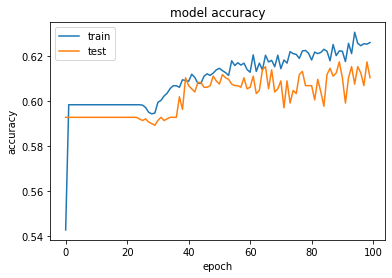

In [36]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">summarize history for loss</span></span>

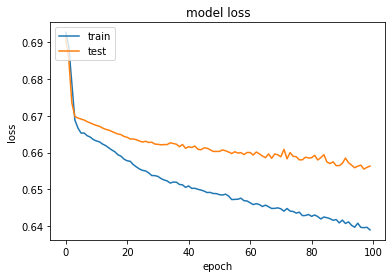

In [37]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
accuracy1, loss1 = model1.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy1}  val loss={loss1}")

45/45 [==============================] - 0s 7ms/step - loss: 0.6563 - acc: 0.6103
Val accuracy=0.6563330292701721  val loss=0.6102889180183411


In [39]:
y_predicted1 =  model1.predict(X_test_2d)

confusion_matr1 = confusion_matrix(Y_test_norm, np.round(model1.predict(X_test_2d)))
confusion_matr1

array([[124, 454],
       [ 99, 742]])

In [40]:
print(
    "True Positive for schizophrenia ", confusion_matr1[0, 0], "\n",
    "False Positive for schizophrenia ", confusion_matr1[0, 1], "\n",
    "False Neagtive For Healthy ", confusion_matr1[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr1[1, 1], "\n")

True Positive for schizophrenia  124 
 False Positive for schizophrenia  454 
 False Neagtive For Healthy  99 
 True Neagtive For Healthy  742 



In [41]:
TP1 = confusion_matr1[0, 0]
FP1= confusion_matr1[0, 1]
FN1 = confusion_matr1[1, 0]
TN1 = confusion_matr1[1, 1]
TP1, FP1, FN1, TN1

(124, 454, 99, 742)

### <span style="color:#e76f51;">Sensitivity for the first network</span>

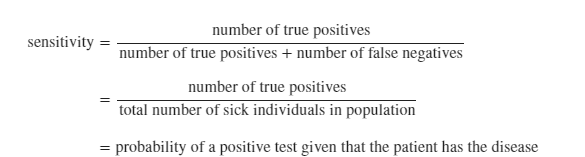

In [42]:
sensitivity1 = TP1 / (TP1 + FN1)
sensitivity1

0.5560538116591929

### <span style="color:#e76f51;">Specificity for the first network</span>

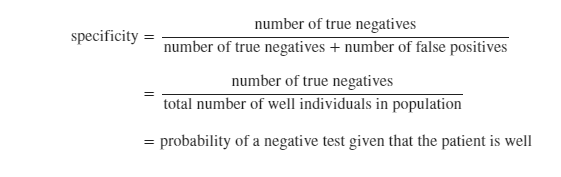

In [43]:
specificity1 = TN1 / (TN1 + FP1)
specificity1

0.6204013377926422

# **<span style="color:#e76f51;">Fully Connected Neural Network </span>**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [45]:
# Simple Neural Networks with 5000 Neurons
model2 = Sequential()
model2.add(Dense(5000,
                  activation='relu',
                  input_shape=(X_train.shape[1:])))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss=keras.losses.binary_crossentropy,
               optimizer=tf.optimizers.Adam(0.000008),
               metrics=['acc'])
model2_checkpoint = ModelCheckpoint('/kaggle/working/models/best_model_weights3.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

### <span style="color:#e76f51;">Training Starts</span>

In [46]:
history_params2 = []
history2 = model2.fit(X_train, Y_train,
          batch_size=17,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test), callbacks=[model2_checkpoint])
model2.save_weights('/kaggle/working/models/best_model_weights3.h5')

Epoch 1/100
334/334 [==============================] - 8s 23ms/step - loss: 10.6711 - acc: 0.6004 - val_loss: 10.4264 - val_acc: 0.6279
Epoch 2/100
334/334 [==============================] - 7s 21ms/step - loss: 4.0256 - acc: 0.8107 - val_loss: 9.8856 - val_acc: 0.6371
Epoch 3/100
334/334 [==============================] - 7s 22ms/step - loss: 2.2723 - acc: 0.8771 - val_loss: 11.0306 - val_acc: 0.6554
Epoch 4/100
334/334 [==============================] - 7s 21ms/step - loss: 1.5179 - acc: 0.9175 - val_loss: 11.7651 - val_acc: 0.6575
Epoch 5/100
334/334 [==============================] - 7s 21ms/step - loss: 1.0071 - acc: 0.9311 - val_loss: 11.7756 - val_acc: 0.6660
Epoch 6/100
334/334 [==============================] - 7s 21ms/step - loss: 1.1402 - acc: 0.9374 - val_loss: 12.0825 - val_acc: 0.6519
Epoch 7/100
334/334 [==============================] - 7s 21ms/step - loss: 0.8801 - acc: 0.9471 - val_loss: 11.7939 - val_acc: 0.6624
Epoch 8/100
334/334 [==============================] - 

In [47]:
loss2, accuracy2 = model2.evaluate(X_test, Y_test)
loss2, accuracy2 

45/45 [==============================] - 0s 6ms/step - loss: 36.2971 - acc: 0.6716


(36.29707717895508, 0.6715997457504272)

## <span style="color:#e76f51;">Summarize History For Accuracy And Loss For Second Network</span>

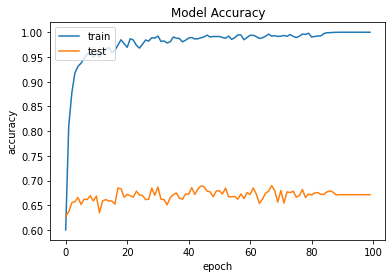

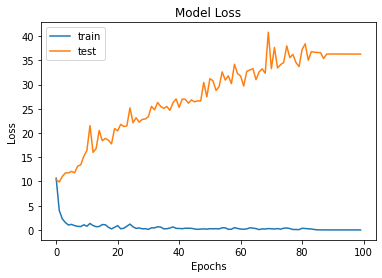

In [48]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">Confusion matrix</span>

In [49]:
y_predicted2 =  model2.predict(X_test)

confusion_matr2 = confusion_matrix(Y_test, np.round(model2.predict(X_test)))
confusion_matr2

array([[318, 260],
       [206, 635]])

In [50]:
print(
 "True Positive for schizophrenia ", confusion_matr2[0, 0], "\n",
 "False Positive for schizophrenia ", confusion_matr2[0, 1], "\n",
 "False Neagtive For Healthy ", confusion_matr2[1, 0], "\n",
 "True Neagtive For Healthy ", confusion_matr2[1, 1], "\n"    
)

True Positive for schizophrenia  318 
 False Positive for schizophrenia  260 
 False Neagtive For Healthy  206 
 True Neagtive For Healthy  635 



In [51]:
TP2 = confusion_matr2[0, 0]
FP2 = confusion_matr2[0, 1]
FN2 = confusion_matr2[1, 0]
TN2 = confusion_matr2[1, 1]
TP2, FP2, FN2, TN2

(318, 260, 206, 635)

### <span style="color:#e76f51;">Sensitivity for the Second network</span>

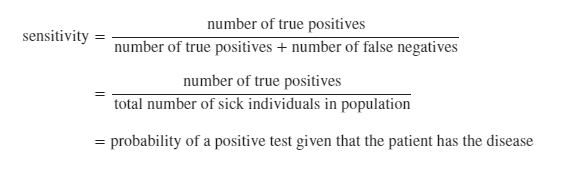

In [52]:
sensitivity2 = TP2 / (TP2 + FN2)
sensitivity2

0.6068702290076335

### <span style="color:#e76f51;">Specificity for the Second network</span>

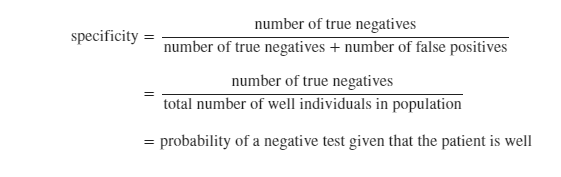

In [53]:
specificity2 = TN2 / (TN2 + FP2)
specificity2

0.7094972067039106

In [54]:
X_train_3d = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1] // len(electrodes_list), len(electrodes_list))
X_test_3d = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1] // len(electrodes_list), len(electrodes_list))

# **<span style="color:#e76f51;">LSTM Model</span>**

In [55]:
X_train_3d.shape ,X_test_3d.shape

((5673, 576, 70), (1419, 576, 70))

In [56]:
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape

In [57]:
inputs = tf.keras.Input(shape=(X_train_3d.shape[1], X_train_3d.shape[2]))
Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(128, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(64, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

Dense_2 = Dense(32, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model3 = tf.keras.Model(inputs, outputs)

In [58]:
model3.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model3_checkpoint = ModelCheckpoint('/kaggle/working/models/best_model_weights4.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

### <span style="color:#e76f51;">Training Starts</span>

In [59]:
history_params3_1 = []
history3_1 = model3.fit(X_train_3d, Y_train_norm,
          batch_size=36,
          epochs=100,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_3d, Y_test_norm), callbacks=[model3_checkpoint])
model3.save_weights('/kaggle/working/models/best_model_weights4.h5')

Epoch 1/100
158/158 [==============================] - 25s 122ms/step - loss: 0.9658 - accuracy: 0.5940 - val_loss: 0.7485 - val_accuracy: 0.6307

Epoch 00001: val_accuracy improved from -inf to 0.63073, saving model to /kaggle/working/models/best_model_weights4.h5
Epoch 2/100
158/158 [==============================] - 17s 110ms/step - loss: 0.7065 - accuracy: 0.6129 - val_loss: 0.6766 - val_accuracy: 0.6103

Epoch 00002: val_accuracy did not improve from 0.63073
Epoch 3/100
158/158 [==============================] - 18s 112ms/step - loss: 0.6471 - accuracy: 0.6281 - val_loss: 0.7248 - val_accuracy: 0.5680

Epoch 00003: val_accuracy did not improve from 0.63073
Epoch 4/100
158/158 [==============================] - 18s 111ms/step - loss: 0.6158 - accuracy: 0.6656 - val_loss: 0.6262 - val_accuracy: 0.6378

Epoch 00004: val_accuracy improved from 0.63073 to 0.63777, saving model to /kaggle/working/models/best_model_weights4.h5
Epoch 5/100
158/158 [==============================] - 17s 10

In [60]:
loss3, accuracy3 = model3.evaluate(X_test_3d, Y_test_norm)
loss3, accuracy3

45/45 [==============================] - 2s 43ms/step - loss: 2.8607 - accuracy: 0.6674


(2.860731601715088, 0.667371392250061)

## <span style="color:#e76f51;">Summarize History For Accuracy And Loss For Second Network</span>

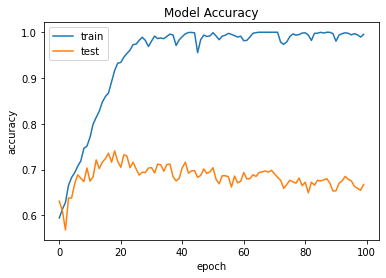

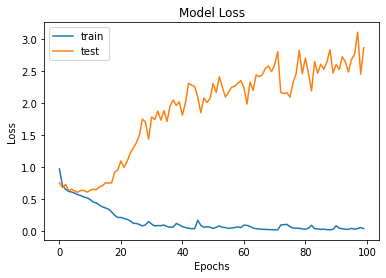

In [61]:
plt.plot(history3_1.history['accuracy'])
plt.plot(history3_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history3_1.history['loss'])
plt.plot(history3_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">Confusion matrix</span>

In [62]:
y_predicted3 =  model3.predict(X_test_3d)

confusion_matr3 = confusion_matrix(Y_test_norm, np.round(model3.predict(X_test_3d)))
confusion_matr3

array([[329, 249],
       [223, 618]])

In [63]:
print(
 "True Positive for schizophrenia ", confusion_matr3[0, 0], "\n",
 "False Positive for schizophrenia ", confusion_matr3[0, 1], "\n",
 "False Neagtive For Healthy ", confusion_matr3[1, 0], "\n",
 "True Neagtive For Healthy ", confusion_matr3[1, 1], "\n"    
)

True Positive for schizophrenia  329 
 False Positive for schizophrenia  249 
 False Neagtive For Healthy  223 
 True Neagtive For Healthy  618 



In [64]:
TP3 = confusion_matr3[0, 0]
FP3 = confusion_matr3[0, 1]
FN3 = confusion_matr3[1, 0]
TN3 = confusion_matr3[1, 1]
TP3, FP3, FN3, TN3

(329, 249, 223, 618)

### <span style="color:#e76f51;">Sensitivity for the third model</span>

In [65]:
sensitivity3 = TP3 / (TP3 + FN3)
sensitivity3

0.5960144927536232

### <span style="color:#e76f51;">Specificity for the third model</span>

In [66]:
specificity3 = TN3 / (TN3 + FP3)
specificity3

0.71280276816609

# **<span style="color:#e76f51;">GRU Model</span>**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [68]:
model5 = Sequential()

model5.add(GRU(units=128, return_sequences=True, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model5.add(Dropout(0.2))

model5.add(GRU(units=64, return_sequences=True))
model5.add(Dropout(0.2))

model5.add(GRU(units=32))
model5.add(Dropout(0.2))

model5.add(Dense(units=1, activation='sigmoid'))

model5.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model5_checkpoint = ModelCheckpoint('/kaggle/working/models/best_model_weights5.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

### <span style="color:#e76f51;">Training Starts</span>

In [69]:
history_params4 = []
history4 = model5.fit(X_train_3d, Y_train_norm,
          batch_size=36,
          epochs=150,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_3d, Y_test_norm), callbacks=[model5_checkpoint])
model5.save_weights('/kaggle/working/models/best_model_weights5.h5')

Epoch 1/150
158/158 [==============================] - 17s 80ms/step - loss: 0.6775 - accuracy: 0.5963 - val_loss: 0.6768 - val_accuracy: 0.5927

Epoch 00001: val_accuracy improved from -inf to 0.59267, saving model to /kaggle/working/models/best_model_weights5.h5
Epoch 2/150
158/158 [==============================] - 11s 72ms/step - loss: 0.6753 - accuracy: 0.5972 - val_loss: 0.6771 - val_accuracy: 0.5927

Epoch 00002: val_accuracy did not improve from 0.59267
Epoch 3/150
158/158 [==============================] - 11s 71ms/step - loss: 0.6728 - accuracy: 0.5984 - val_loss: 0.6802 - val_accuracy: 0.5899

Epoch 00003: val_accuracy did not improve from 0.59267
Epoch 4/150
158/158 [==============================] - 11s 72ms/step - loss: 0.6703 - accuracy: 0.5972 - val_loss: 0.6738 - val_accuracy: 0.5920

Epoch 00004: val_accuracy did not improve from 0.59267
Epoch 5/150
158/158 [==============================] - 11s 72ms/step - loss: 0.6671 - accuracy: 0.5965 - val_loss: 0.6790 - val_accu

In [70]:
loss4, accuracy4 = model5.evaluate(X_test_3d, Y_test_norm)
loss4, accuracy4 

45/45 [==============================] - 1s 30ms/step - loss: 0.2487 - accuracy: 0.9373


(0.24866348505020142, 0.9372797608375549)

## <span style="color:#e76f51;">Summarize History For Accuracy And Loss For Second Network</span>

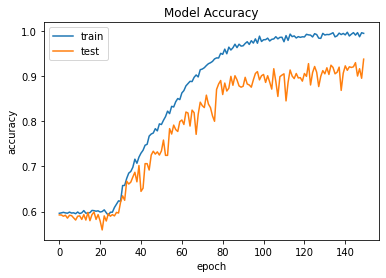

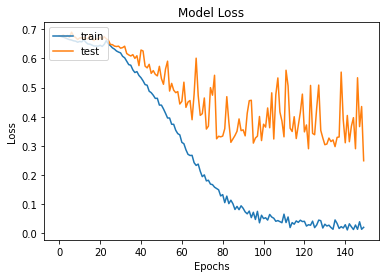

In [71]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">Confusion matrix</span>

In [72]:
y_predicted4 =  model5.predict(X_test_3d)

confusion_matr4 = confusion_matrix(Y_test_norm, np.round(model5.predict(X_test_3d)))
confusion_matr4

array([[527,  51],
       [ 38, 803]])

In [73]:
print(
 "True Positive for schizophrenia ", confusion_matr4[0, 0], "\n",
 "False Positive for schizophrenia ", confusion_matr4[0, 1], "\n",
 "False Neagtive For Healthy ", confusion_matr4[1, 0], "\n",
 "True Neagtive For Healthy ", confusion_matr4[1, 1], "\n"    
)

True Positive for schizophrenia  527 
 False Positive for schizophrenia  51 
 False Neagtive For Healthy  38 
 True Neagtive For Healthy  803 



In [74]:
TP4 = confusion_matr4[0, 0]
FP4 = confusion_matr4[0, 1]
FN4 = confusion_matr4[1, 0]
TN4 = confusion_matr4[1, 1]
TP4, FP4, FN4, TN4

(527, 51, 38, 803)

### <span style="color:#e76f51;">Sensitivity for the fourth model</span>

In [75]:
sensitivity4 = TP4 / (TP4 + FN4)
sensitivity4

0.9327433628318584

### <span style="color:#e76f51;">Specificity for the fourth model</span>

In [76]:
specificity4 = TN4 / (TN4 + FP4)
specificity4

0.9402810304449649

In [77]:
from tensorflow.keras.models import save_model
save_model(model5, 'gru_model.h5')